# News Article Analysis

Dataset description

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially unreliable

1: Fake

0: True

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#libraries for text analysis
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SENTIA INTERN
[nltk_data]     USER 1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
#Stopwords are removed from the dataset which are not significant

## Data pre-processing

In [7]:
news_data = pd.read_csv("newsdataset.csv")

In [8]:
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [27]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       18285 non-null  int64 
 1   title    18285 non-null  object
 2   author   18285 non-null  object
 3   text     18285 non-null  object
 4   label    18285 non-null  int64 
 5   content  18285 non-null  object
 6   length   18285 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [28]:
news_data.shape

(18285, 7)

In [29]:
news_data.dtypes

id          int64
title      object
author     object
text       object
label       int64
content    object
length      int64
dtype: object

In [30]:
news_data.describe(include="object").T

,count,unique,top,freq
title,18285,17931,Get Ready For Civil Unrest: Survey Finds That ...,5
author,18285,3838,Pam Key,243
text,18285,18017,,72
content,18285,18121,Sam Sifton What to Cook This Week - The New Yo...,4


In [31]:
missing_values=news_data.isnull().sum().sort_values(ascending=False)
print(missing_values)

id         0
title      0
author     0
text       0
label      0
content    0
length     0
dtype: int64


In [32]:
percent_missing_values = (news_data.isnull().sum()*100/news_data.isnull().count()).sort_values(ascending=False)
print(percent_missing_values)

id         0.0
title      0.0
author     0.0
text       0.0
label      0.0
content    0.0
length     0.0
dtype: float64


In [33]:
news_data.dropna(axis=0,inplace=True)

In [34]:
news_data.shape

(18285, 7)

In [35]:
news_data['text'].value_counts().sum()

18285

In [36]:
news_data['author'].value_counts().sum()

18285

In [37]:
# merging the author name and news title
news_data['content'] = news_data['author']+' '+news_data['title']

In [38]:
print(news_data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 18285, dtype: object


In [39]:
news_data["length"] = news_data['content'].apply(len)

<Axes: xlabel='length', ylabel='Density'>

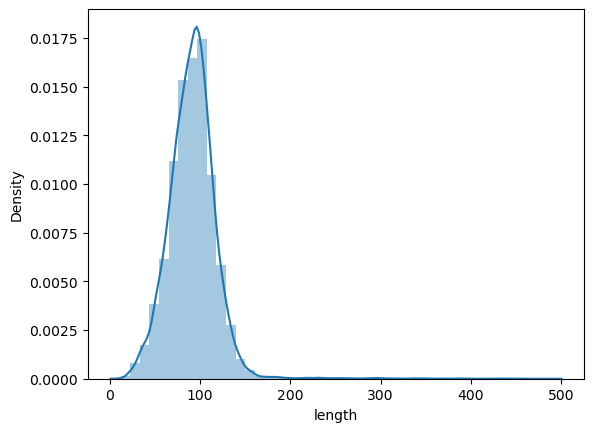

In [40]:
sns.distplot(news_data.length,bins=45,kde=True)

In [41]:
news_data["length"].describe()

count    18285.000000
mean        91.187367
std         26.554063
min         12.000000
25%         75.000000
50%         92.000000
75%        106.000000
max        489.000000
Name: length, dtype: float64

In [42]:
#Highest length of a text is 330

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

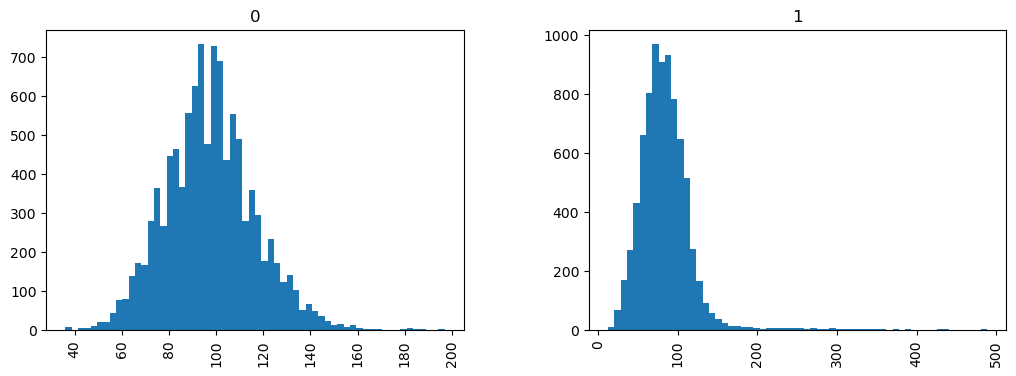

In [44]:
news_data.hist(column='length', by='label',bins=60, figsize=(12,4))

In [45]:
#stemming
port_stem = PorterStemmer()

In [46]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [47]:
news_data['content'] = news_data['content'].apply(stemming)

In [48]:
print(news_data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 18285, dtype: object


In [49]:
X = news_data['content']
y = news_data['label']

In [50]:
#converting text into numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [51]:
print(X)

  (0, 14626)	0.2853880981846006
  (0, 12567)	0.25566372256502734
  (0, 8310)	0.3609049070394367
  (0, 8048)	0.29347549279156676
  (0, 7190)	0.24556189342497173
  (0, 6552)	0.21745594418933306
  (0, 4637)	0.23016077319140021
  (0, 3543)	0.2684494960336511
  (0, 3359)	0.3609049070394367
  (0, 2757)	0.2466340295002162
  (0, 2312)	0.3745612250433202
  (0, 247)	0.26982554594264346
  (1, 15663)	0.3053027963338981
  (1, 6377)	0.19285723710368197
  (1, 5140)	0.7119376870709988
  (1, 3328)	0.2623789770430963
  (1, 2619)	0.19368327535633711
  (1, 2066)	0.38191890436039194
  (1, 1764)	0.1509985164277699
  (1, 1391)	0.29617980713962144
  (2, 14560)	0.4180284001448272
  (2, 8973)	0.4948460479407663
  (2, 5579)	0.3490632212946542
  (2, 5031)	0.38709995799949964
  (2, 2895)	0.4581003415623782
  :	:
  (18282, 12239)	0.252743907968046
  (18282, 11515)	0.2748252773264482
  (18282, 11321)	0.24588400571511215
  (18282, 9605)	0.07665665104558947
  (18282, 8942)	0.1712955017712004
  (18282, 8879)	0.29296479

In [52]:
!pip install wordcloud

In [53]:
from wordcloud import WordCloud

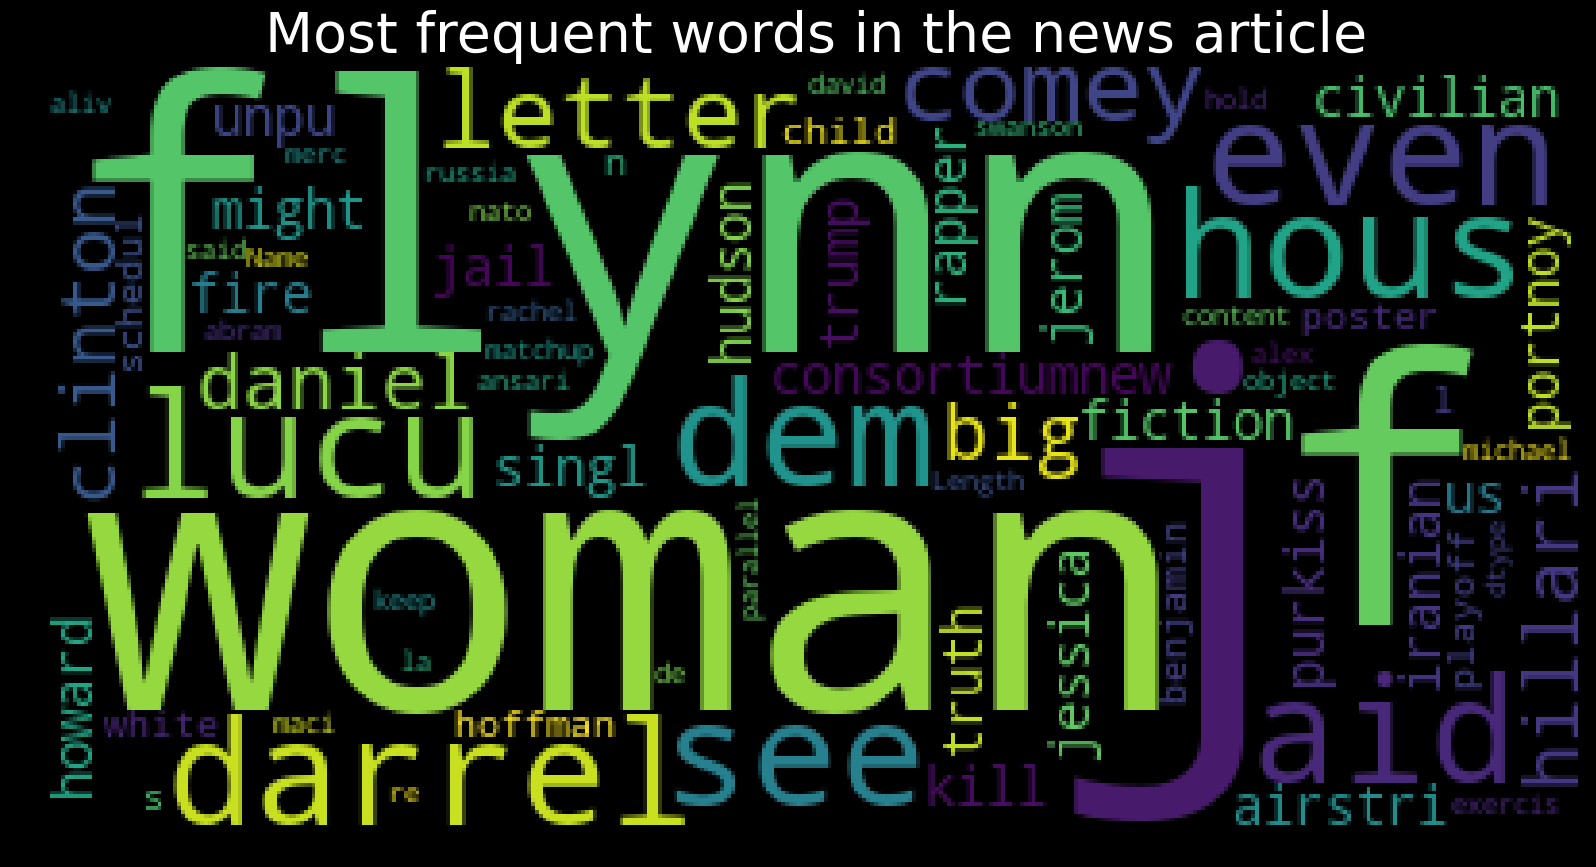

In [54]:
wc = WordCloud()
wc.generate(str(news_data['content']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title('Most frequent words in the news article', fontsize=40, color="white")
plt.imshow(wc)
plt.show()

In [55]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14628, 15960)
(3657, 15960)
(14628,)
(3657,)


## Logistic Regression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
# accuracy score on the training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)

In [60]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9894722450095707


In [61]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [62]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.983866557287394


## KNN Classifier

In [63]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# accuracy score on the training data
X_train_pred_KNN = knn_model.predict(X_train)
training_data_accuracy_KNN = accuracy_score(X_train_pred_KNN, y_train)

In [65]:
print('Accuracy score of the training data : ', training_data_accuracy_KNN)

Accuracy score of the training data :  0.4716297511621548


In [66]:
# accuracy score on the test data
X_test_prediction_KNN = knn_model.predict(X_test)
test_data_accuracy_KNN = accuracy_score(X_test_prediction_KNN, y_test)

In [67]:
print('Accuracy score of the test data : ', test_data_accuracy_KNN)

Accuracy score of the test data :  0.4643150123051682


## Naive Bayes

In [68]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)

MultinomialNB()

In [69]:
# accuracy score on the training data
X_train_pred_mnb = mnb_model.predict(X_train)
training_data_accuracy_mnb = accuracy_score(X_train_pred_mnb, y_train)

In [70]:
print('Accuracy score of the training data : ', training_data_accuracy_mnb)

Accuracy score of the training data :  0.9743642329778507


In [71]:
# accuracy score on the test data
X_test_prediction_mnb = mnb_model.predict(X_test)
test_data_accuracy_mnb = accuracy_score(X_test_prediction_mnb, y_test)

In [72]:
print('Accuracy score of the test data : ', test_data_accuracy_mnb)

Accuracy score of the test data :  0.9480448455017774
